# Assignment 2: Due Tuesday 9/17

## 2D Projectile Motion with Quadratic Drag 

Quadratic drag term is given by $\vec{f}_{drag} = -cv\vec{v}$. This leads to equations of motion in the horizontal ($x$) and vertical ($y$) directions given by 

* $m v_{x}' = -\left(c\sqrt{v^2_x +v^2_y}\right)v_x$

* $m v_{y}' = - mg - \left(c\sqrt{v^2x + v^2_y}) \right)v_y$

* $x' = v_x$

* $y' = v_y$

,where $'$ is a time derivative.

You can read more about drag forces here: https://openstax.org/books/university-physics-volume-1/pages/6-4-drag-force-and-terminal-speed

## Problem

To get an accurate trajectory for a projectile one must often take account of several complications. For example, if a projectile goes very high then we have to allow for the reduction in air resistance as atmospheric density decreases. To illustrate this, consider an iron cannonball (diameter, $D = 15\;cm$, density $\rho = 7.8\;g/cm^3$) that is fired with initial velocity $300 m/s$ at 50 degrees above the horizontal. The drag force is approximately quadratic, but since the drag is proportional to the atmospheric density and the density falls off exponentially with height, the drag force is $f = c(y) v^2$ where $c(y) = \gamma D^2 exp(-y/\lambda)$ with $\gamma$ given as $0.25\;N\cdot s^2/m^4$ and $\lambda = 10,000\;m$. 

# Part a)

Ignoring air resistance completely, write down the equations of motion for the cannonball (use the markup feature in Jupyter notbook and latex (https://en.wikibooks.org/wiki/LaTeX/Mathematics)). Your answer should depend on only $v_x, v_y,$ and $g$ 

Equations with no air resistance ($c = 0$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function 

In [751]:
import numpy as np
import math
%matplotlib inline

#define projectile motion function in vacuum
v0 = 300
theta = 50*np.pi/180
g = 9.81
p = 7.8*1000
d = 0.15
V = (4/3)*np.pi*((d/2)**3)
m = p*V

vx0 = v0*np.cos(theta) # x component of velocity
vy0 = v0*np.sin(theta) # y component of velocity

def proj_vac(t, Z):
    x, y, vx, vy = Z
    dx_dt = vx
    dy_dt = vy
    dvx_dt = 0
    dvy_dt = -g
    return [dx_dt, dy_dt, dvx_dt, dvy_dt]


Using Scipy (*RK4(5)* method) solve numerically $x(t)$ and $y(t)$ for $0 \le t \le 50\;s$

In [754]:
#code
from scipy import integrate

x0 = 0
y0 = 0
initial = [x0, y0, vx0, vy0]

t0 = 0
tf = 50
n = 1000
t = np.linspace(t0, tf, n)

sol_vac = integrate.solve_ivp(proj_vac, (t0, tf), initial, t_eval=t, method='RK45')
X_vac = sol_vac.y[0]
Y_vac = sol_vac.y[1]


Plot the ball's trajectory (vertical vs. horizontal positions) and find it's horizontal range. At what time does the ball hit the ground?

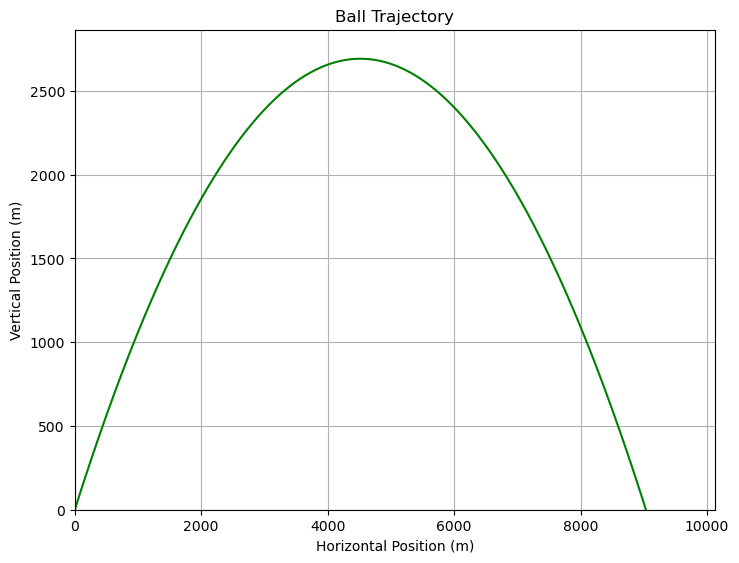

(9033.771811810837, 46.84684684684685)

In [757]:
#codes
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(X_sol, Y_sol, 'g', label = 'Trajectory')
ax.set_xlabel('Horizontal Position (m)')
ax.set_ylabel('Vertical Position (m)')
plt.xlim(left=0)
plt.ylim(bottom=0)
ax.grid()
plt.title('Ball Trajectory')
plt.show()

ground = np.where(Y_sol >= 0)[0][-1]
ground_time = sol_RK45.t[ground]
horizontal_range = X_sol[ground]

(horizontal_range, ground_time)

# Part b)

Write your own Runge-Kutta order 4 function and use it to solve Part a) [Meaning do not use Scipy for this part].

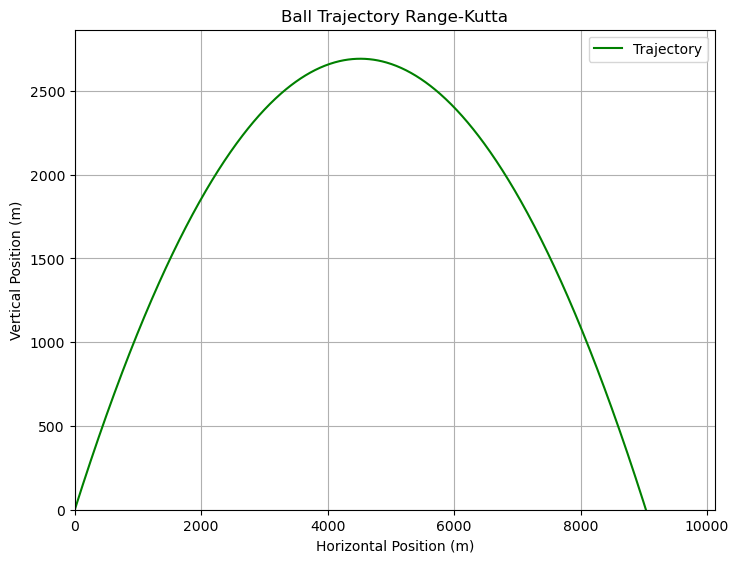

In [760]:
#codes
def rangekutta_4(f,t,x0, args=()):
    n = len(t)
    x = np.zeros((n, len(x0)))
    x[0] = initial
    for i in range (0,n-1):  
        dt = t[i+1] - t[i]
        k1 = np.array(f(t[i], x[i], *args))
        k2 = np.array(f(t[i] + dt / 2.0, x[i] + dt / 2.0 * k1, *args))
        k3 = np.array(f(t[i] + dt / 2.0, x[i] + dt / 2.0 * k2, *args))
        k4 = np.array(f(t[i] + dt, x[i] + dt * k3, *args))

        x[i+1] = x[i] + (dt/6.0) * (k1+2*k2+2*k3+k4)

    return x

sol_rk4 = rangekutta_4(proj_vac,t,initial)
X_sol_rk4 = sol_rk4[:, 0]
Y_sol_rk4 = sol_rk4[:, 1]

fig = plt.figure()
ax = fig.add_subplot([1,1,1,1])
ax.plot(X_sol_rk4, Y_sol_rk4, 'g', label = 'Trajectory')
ax.legend(loc = 'best')
ax.set_xlabel('Horizontal Position (m)')
ax.set_ylabel('Vertical Position (m)')
plt.xlim(left=0)
plt.ylim(bottom=0)
ax.grid()
plt.title('Ball Trajectory Range-Kutta')
plt.show()

How does your Runge-Kutta 4th order evaluation compare to Scipy's *RK4(5)* method?

# Part c)

Now include air resistance, but ignore the variation of atmospheric pressure [that is  treat $c(y)$ as a constant  that does not change with position, where $c = \gamma D^2$].

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). Your answers should depend only on $c, m, v, v_x, v_y,$ and $g$.

Equations with no air resistance ($c = const$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function

In [766]:
gamma_const = 0.25

def proj_res(t, Z):
    x, y, vx, vy = Z
    v = np.sqrt(vx ** 2 + vy ** 2)
    c = gamma_const * (d ** 2)  
    
    dx_dt = vx
    dy_dt = vy
    dvx_dt = -(c / m) * v * vx
    dvy_dt = -g - (c / m) * v * vy
    
    return [dx_dt, dy_dt, dvx_dt, dvy_dt]


Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [769]:
#codes

t0 = 0
tf = 35
n = 1000
t = np.linspace(t0,tf,n)

sol_res = integrate.solve_ivp(proj_res, (t0, tf), initial, t_eval=t, method='RK45')
X_res = sol_res.y[0]
Y_res = sol_res.y[1]


Plot the ball's trajecory and find it's horizontal range. At what time does the ball hit the ground?

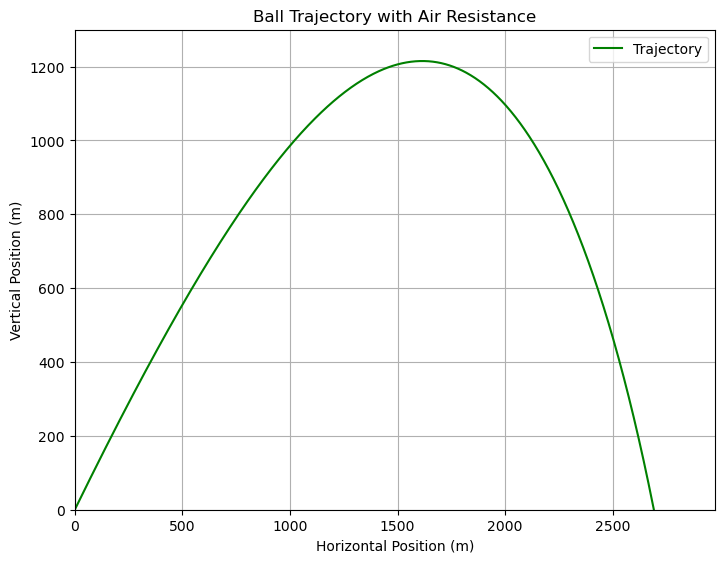

(6.577296575652156, 2.1721721721721723)

In [795]:
#codes
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(X_res, Y_res, 'g', label = 'Trajectory')
ax.legend(loc = 'best')
ax.set_xlabel('Horizontal Position (m)')
ax.set_ylabel('Vertical Position (m)')
plt.xlim(left=0)
plt.ylim(bottom=0)
ax.grid()
plt.title('Ball Trajectory with Air Resistance')
plt.show()

ground = np.where(Y_sol_res >= 0)[0][-1]
ground_time = sol_RK45_res.t[ground]
horizontal_range = X_sol_res[ground]

(horizontal_range, ground_time)

# Part d)

Now include the drag term with the atmospheric variation included [meaning $c(y) = \gamma D^2exp(-y/\lambda)$]

Write down the equations of motion (use the markup feature in Jupyter notbook and latex). For this part write out explicitly what $c$ is in your equations, e.g. $a*c = a* \gamma D^2exp(-y/\lambda)$. Your equations should depend only on $\gamma, \lambda, y, D, v, v_x, v_y, m,$ and $g$.

Equations with no air resistance ($c = \gamma D^2exp(-y/\lambda)$):

* $v_x' = $

* $x' = $

* $v_y' = $

* $y' = $

Code the equations into a function

In [777]:
#code
Lambda = 10000 

def proj_atm(t, Z):
    x, y, vx, vy = Z
    v = np.sqrt(vx ** 2 + vy ** 2)
    cy = gamma_const * (d ** 2) * np.exp(-y / Lambda)  # drag varying with height
    dx_dt = vx
    dy_dt = vy
    dvx_dt = -(cy / m) * v * vx
    dvy_dt = -g - (cy / m) * v * vy
    return [dx_dt, dy_dt, dvx_dt, dvy_dt]


Use Scipy (*RK4(5)* method) to solve numerically $x(t)$ and $y(t)$ for $0\le t \le 35\;s$

In [780]:
#codes

t0 = 0
tf = 35
n = 1000
t = np.linspace(t0,tf,n)

sol_atm = integrate.solve_ivp(proj_atm, (t0, tf), initial, t_eval=t, method='RK45')
X_atm = sol_atm.y[0]
Y_atm = sol_atm.y[1]


Plot the ball's trajectory and find it's horizontal range. At what time does it hit the ground?

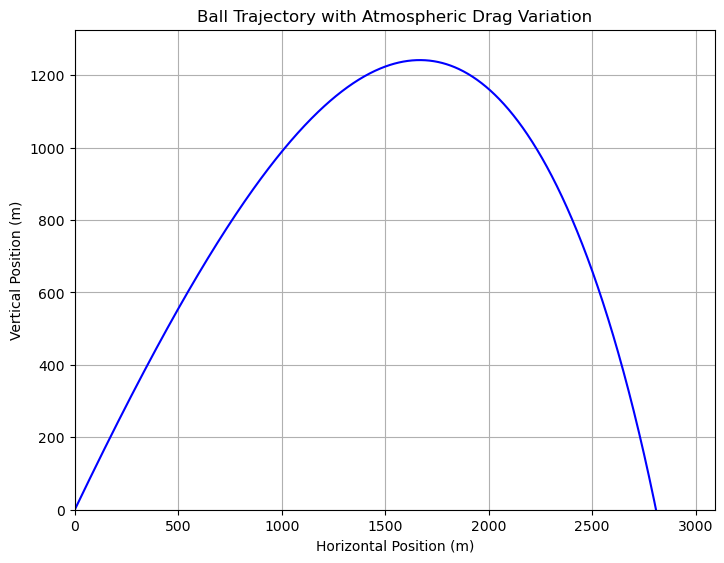

(2807.2754794452253, 31.531531531531535)

In [793]:
#codes
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.plot(X_atm, Y_atm, 'b', label = 'Trajectory')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax.set_xlabel('Horizontal Position (m)')
ax.set_ylabel('Vertical Position (m)')
plt.xlim(left=0)
plt.ylim(bottom=0)
ax.grid()
plt.title('Ball Trajectory with Atmospheric Drag Variation')
plt.show()

ground = np.where(Y_atm >= 0)[0][-1]
ground_time = sol_atm.t[ground]
horizontal_range = X_atm[ground]

(horizontal_range, ground_time)

# Part e)

Plot the trajectories from parts a), c), and d) on the same plot.

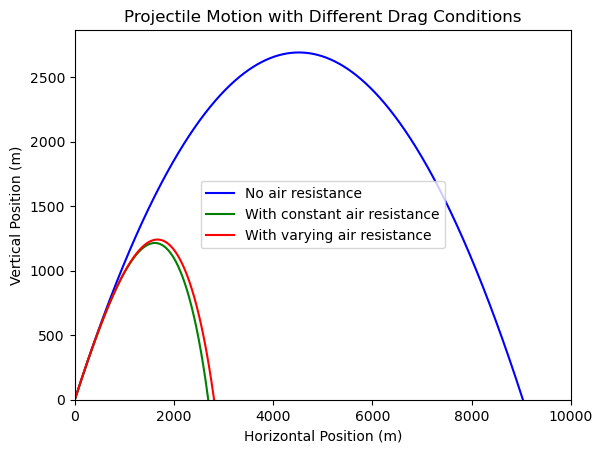

In [791]:
plt.figure()
plt.plot(X_vac, Y_vac, label='No air resistance', color='b')
plt.plot(X_res, Y_res, label='With constant air resistance', color='g')
plt.plot(X_atm, Y_atm, label='With varying air resistance', color='r')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.xlim(left=0, right=10000)
plt.ylim(bottom=0)
plt.title('Projectile Motion with Different Drag Conditions')
plt.legend(loc='best')
plt.show()

Your results should look like the plot below.

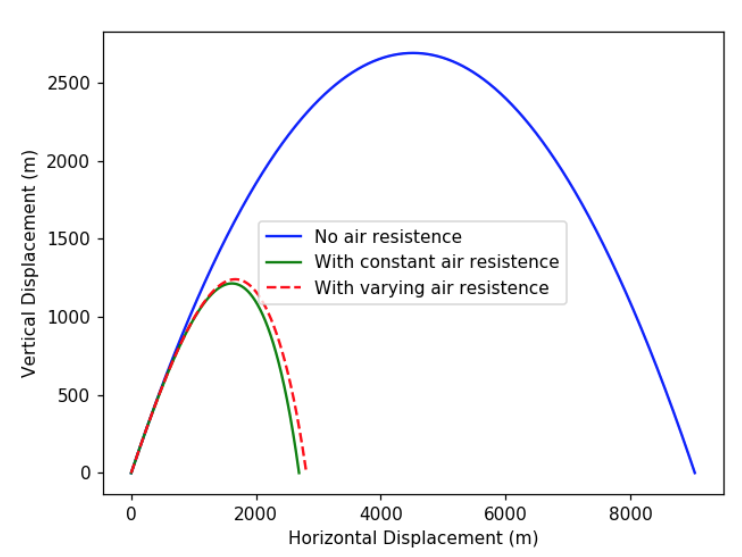

**What impacts the motion more: turning on air resistance (i.e with $c(0)$) or turning on the variation with atmosphere (i.e. $c(y)$) ?**